In [1]:
""" 
    Docstring
    
Introduction:    
The aim of this script is to investigate the data and to create a predictive
model for a continuous response variable. For this, model preparation, feature
engineering, variable selection and model development will be used.

"""

' \n    Docstring\n    \nIntroduction:    \nThe aim of this script is to investigate the data and to create a predictive\nmodel for a continuous response variable. For this, model preparation, feature\nengineering, variable selection and model development will be used.\n\n'

First lets import the libraries that we will be using for the script.

In [2]:
# Importing libraries needed.
# Pandas for data science essentials
import pandas as pd 
# Matplotlib and seaborn for graphical output.
import matplotlib.pyplot as plt
import seaborn as sns 
# Statsmodels for predictive modeling.
import statsmodels.formula.api as smf
# Random for setting up seed and generating random numbers.
import random as rand
# Numpy for math essentials.
import numpy as np
# Importin sklearn for models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model

Now lets set up the seed.

In [3]:
# Setting up random seed.
rand.seed(a = 219)

In [4]:
# Loading the data and reading it.
file = './__datasets/birthweight_low.xlsx'
df_original = pd.read_excel(io = file)

# Printing the fist five and last rows to get an idea of the data.
print(df_original.head(n=5))
print(df_original.tail(n =5))


   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  
     mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
191    30   12.0       5   12.0    38    NaN      5      7     3      2     1   
192    41   14.0       2   12.0    47   16.0      8      

Creating a copy of the original data to manipulate to avoid modifying it.

In [5]:
df = df_original.copy()

In [6]:
# Getting info about the features types and 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [7]:
# Printing the dimensions of the dataset.
print(f"""
Size of Original Dataset
------------------------
Observations: {df.shape[0]}
Features:     {df.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [8]:
# Getting the names of the features.
for i in df:
    print (i)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


So after getting the information about the dataset, it became clear that there are missing values, all the missing values are from float64 type data. Next step will be dealing with this missing values.
To do this, a loop will be created to see how the variables with missing values are distributed by using histograms to get a rough idea if we should substitute the missing values with mean or median. Also, .describe() will be used to see the stats of the features. 

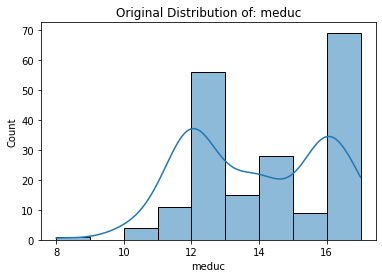

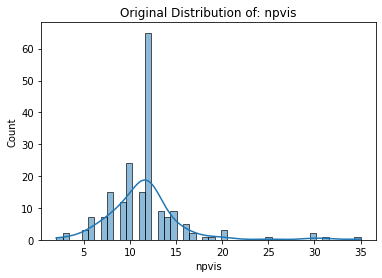

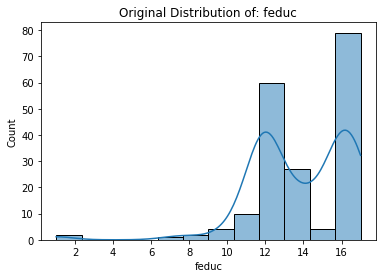

In [9]:
# Creating a list of the features.
df_list_1 = ['meduc','npvis','feduc']
# Creating a loop to print a histogram for every variable.
for j in df_list_1:
# Usinf seaborn to create the 
    sns.histplot(data = df,
          x      = j,
          kde    = True)

# title and axis labels
    plt.title(label   = (f"""Original Distribution of: {j}"""))
    plt.xlabel(xlabel = j) # avoiding using dataset labels
    plt.ylabel(ylabel = "Count")

# displaying the histogram
    plt.show()

In [10]:
df.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


For npvis, it seems to follow a normal distribution. The other two variables do not. Using the describe function, the observation is that the median could be a right fit to substitute the missing values because it will not be affected that much by the skewness of the values. 

In [11]:
# Substituting median for missing values.
npvis_median = df['npvis'].median()
df['npvis'].fillna(value = npvis_median,
                         inplace = True)
# Substituting median for missing values.
meduc_median = df['meduc'].median()
df['meduc'].fillna(value = meduc_median,
                         inplace = True)
# Substituting median for missing values.
feduc_median = df['feduc'].median()
df['feduc'].fillna(value = feduc_median,
                         inplace = True)
# Checking that the values have been filled.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


Now that the values have been substituted, the plan is to create scatter plots to be able to see how the variables are against the target variable.


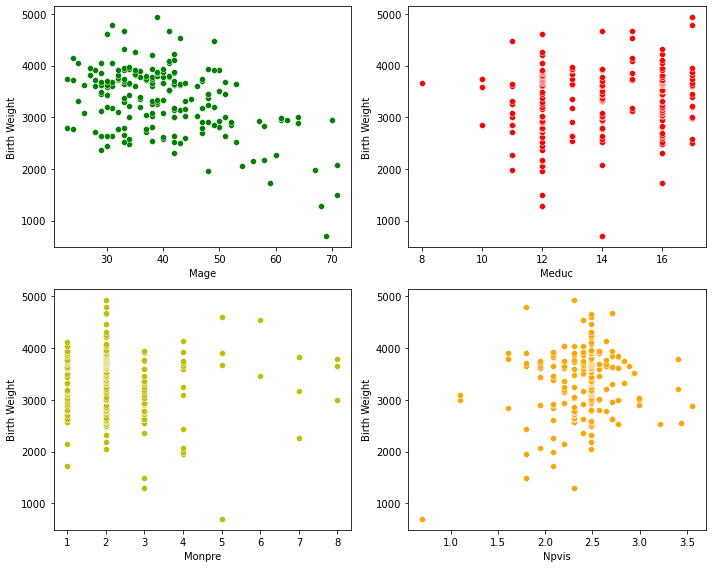

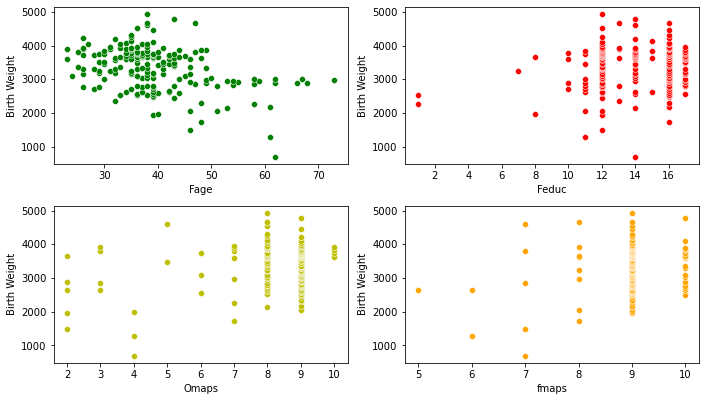

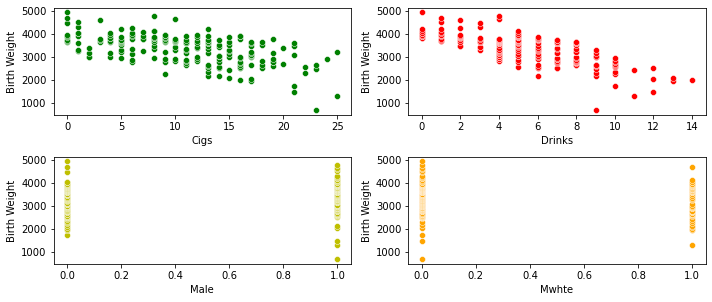

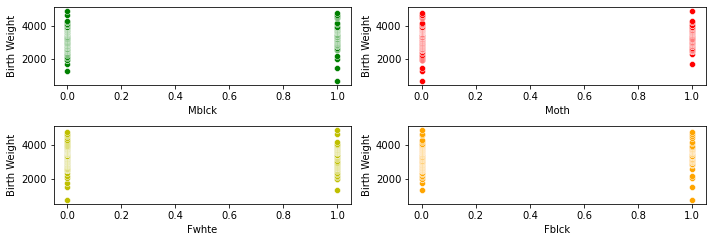

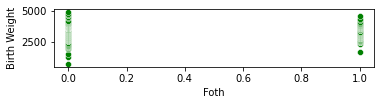

In [12]:
# Creating scatter plots.

# Setting figure size.
fig, ax = plt.subplots(figsize = (10, 8))
########################
# Developing a scatterplot.
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['mage'],
                y = df['bwght'],
                color = 'g')
# Adding labels.
plt.xlabel(xlabel = 'Mage')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(2, 2, 2)
sns.scatterplot(x = df['meduc'],
                y = df['bwght'],
                color = 'r')
# Adding labels.
plt.xlabel(xlabel = 'Meduc')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(2, 2, 3)
sns.scatterplot(x = df['monpre'],
                y = df['bwght'],
                color = 'y')
# Adding labels.
plt.xlabel(xlabel = 'Monpre')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = np.log(df['npvis']),
                y = df['bwght'],
                color = 'orange')
# Adding labels.
plt.xlabel(xlabel = 'Npvis')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Cleaning up layout and displaying the results.
plt.tight_layout()
plt.show()

########################

# Setting figure size.
fig, ax = plt.subplots(figsize = (10, 8))

########################
# Developing a scatterplot.
plt.subplot(3, 2, 1)
sns.scatterplot(x = df['fage'],
                y = df['bwght'],
                color = 'g')
# Adding labels.
plt.xlabel(xlabel = 'Fage')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(3, 2, 2)
sns.scatterplot(x = df['feduc'],
                y = df['bwght'],
                color = 'r')
# Adding labels.
plt.xlabel(xlabel = 'Feduc')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(3, 2, 3)
sns.scatterplot(x = df['omaps'],
                y = df['bwght'],
                color = 'y')
# Adding labels.
plt.xlabel(xlabel = 'Omaps')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(3, 2, 4)
sns.scatterplot(x = df['fmaps'],
                y = df['bwght'],
                color = 'orange')
# Adding labels.
plt.xlabel(xlabel = 'fmaps')
plt.ylabel(ylabel = 'Birth Weight')

# Cleaning up layout and displaying the results.
plt.tight_layout()
plt.show()

# Setting figure size.
fig, ax = plt.subplots(figsize = (10, 8))

########################
# Developing a scatterplot.
plt.subplot(4, 2, 1)
sns.scatterplot(x = df['cigs'],
                y = df['bwght'],
                color = 'g')
# Adding labels.
plt.xlabel(xlabel = 'Cigs')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(4, 2, 2)
sns.scatterplot(x = df['drink'],
                y = df['bwght'],
                color = 'r')
# Adding labels.
plt.xlabel(xlabel = 'Drinks')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(4, 2, 3)
sns.scatterplot(x = df['male'],
                y = df['bwght'],
                color = 'y')
# Adding labels.
plt.xlabel(xlabel = 'Male')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(4, 2, 4)
sns.scatterplot(x = df['mwhte'],
                y = df['bwght'],
                color = 'orange')
# Adding labels.
plt.xlabel(xlabel = 'Mwhte')
plt.ylabel(ylabel = 'Birth Weight')

# Cleaning up layout and displaying the results.
plt.tight_layout()
plt.show()

# Setting figure size.
fig, ax = plt.subplots(figsize = (10, 8))

########################
# Developing a scatterplot.
plt.subplot(5, 2, 1)
sns.scatterplot(x = df['mblck'],
                y = df['bwght'],
                color = 'g')
# Adding labels.
plt.xlabel(xlabel = 'Mblck')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(5, 2, 2)
sns.scatterplot(x = df['moth'],
                y = df['bwght'],
                color = 'r')
# Adding labels.
plt.xlabel(xlabel = 'Moth')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(5, 2, 3)
sns.scatterplot(x = df['fwhte'],
                y = df['bwght'],
                color = 'y')
# Adding labels.
plt.xlabel(xlabel = 'Fwhte')
plt.ylabel(ylabel = 'Birth Weight')

########################
# Developing a scatterplot.
plt.subplot(5, 2, 4)
sns.scatterplot(x = df['fblck'],
                y = df['bwght'],
                color = 'orange')
# Adding labels.
plt.xlabel(xlabel = 'Fblck')
plt.ylabel(ylabel = 'Birth Weight')

# Cleaning up layout and displaying the results.
plt.tight_layout()
plt.show()

########################
# Setting figure size.
fig, ax = plt.subplots(figsize = (10, 8))
########################
# Developing a scatterplot.
plt.subplot(6, 2, 1)
sns.scatterplot(x = df['foth'],
                y = df['bwght'],
                color = 'g')
# Adding labels.
plt.xlabel(xlabel = 'Foth')
plt.ylabel(ylabel = 'Birth Weight')

# Cleaning up layout and displaying the results.
plt.tight_layout()
plt.show()


So the idea now is to run a model to get an idea of what the base scenario would be, this is not the submission model, it is just to get an idea.

In [13]:
# Building a base model with a log transformed response variable.

# Creating the first model.
first_model = smf.ols(formula = """bwght ~ mage +
                                            meduc + 
                                            monpre +
                                            npvis +
                                            fage +
                                            feduc +
                                            omaps +
                                            fmaps +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth""",
                        data = df)


# Fitting the values.
results_1 = first_model.fit()


# Printing results.
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     31.06
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.90e-42
Time:                        22:11:16   Log-Likelihood:                -1420.9
No. Observations:                 196   AIC:                             2874.
Df Residuals:                     180   BIC:                             2926.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2313.0728    296.759      7.794      0.0

So what we have seen from this model is that there are a few variables that do not seem to be really explaining the model, or at least, they do not seem significant. Modifications will have to be made in order to improve it, the R squared is not bad but could be better.

In [14]:
# Building model without statistically insignificant x variables.

# INSTANTIATING a model type
second_model = smf.ols(formula = """bwght ~ mage + 
                                            cigs +
                                            drink +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth""",
                        data = df)


# Fitting the data.
results_2 = second_model.fit()


# Printing results.
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-46
Time:                        22:11:16   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.0

In this new model, all the statistically insignificant variables have been removed, we have decreased R squared, but the model is better. Nevertheless, it has become clear that some feature engineering might be needed. For this, the variables that are not continuous will have logs created for them. 

In [15]:
# Creating logs of the continious variables.
df['feduc'] = np.log(df['feduc'])
df['meduc'] = np.log(df['meduc'])
df['npvis'] = np.log(df['npvis'])
df.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,2.621830,2.341837,2.392537,39.290816,2.597524,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,0.150067,1.355136,0.352281,8.982725,0.313256,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,2.079442,1.000000,0.693147,23.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,2.484907,2.000000,2.302585,34.750000,2.484907,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,2.639057,2.000000,2.484907,38.000000,2.639057,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,2.772589,3.000000,2.484907,43.000000,2.772589,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,2.833213,8.000000,3.555348,73.000000,2.833213,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


Now, some ideas have appeared, maybe new variables could be created, taking into consideration the following reasoning:
- If omaps is smaller than fmaps give it a 0, if not 1. This will help the model make sense of those variables since if the baby is better it might explain the bigger weight.
- If drinks are bigger than 7 (since 1 cup of wine a day is not bad) give it 1, else 0. (Did not end up using this since it made the model worse)
- According to research, if both parents are over the age of 35, it is likely that the child might be born underweight, thus, I created a new feature for both, and to make it more precise, even another feature that only if they are both over 35 gives a 1, else, a 0.
- If the mother does the minimum standard visits (9 since there are 9 in a standard pregnancy) give it one, else, a 0.

In [16]:
# placeholder variables
df['fbo'] = 0
df['bd']  = 0
df['dfage'] = 0
df['dmage'] = 0
df['tage'] = 0
df['nnpvis'] = 0
df['nmonpre'] = 0
df['ncigs'] = 0
for index, value in df.iterrows():
    

    # Drinks
    if df.loc[index, 'drink'] >= 7:
        df.loc[index, 'bd'] = 1 
        
    if df.loc[index,'cigs'] > 0:
        df.loc[index,'ncigs'] = 1
        
    # Fmaps and omaps
    if df.loc[index, 'fmaps'] > df.loc[index,'omaps']:
        df.loc[index, 'fbo'] = 1
        
    if df.loc[index, 'fage'] >= 35 :
        df.loc[index,'dfage'] = 1
        
    if df.loc[index,'mage']>=35 :
        df.loc[index,'dmage'] = 1
    
    if df.loc[index,'dfage'] == df.loc[index,'dmage']:
        df.loc[index,'tage'] = 1
        
        
    if df.loc[index,'npvis'] >= 9:
        df.loc[index,'nnpvis'] = 1
        
    if df.loc[index,'monpre'] >= 2:
        df.loc[index,'nmonpre'] = 1
    
#df[  [  'fbo', 'bd']  ] 

Here I created a correlation matrix to see what was the relationship with the endogenous variable.

In [17]:
"""# developing a small correlation matrix
zeroes_corr = df.corr().round(decimals = 2)
df['bwght'] = np.log(df['bwght'])

# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['bwght',                   # Y-variable
               ['fbo', # X-variables
                'bd']] \
                .sort_values(ascending = False)"""

"# developing a small correlation matrix\nzeroes_corr = df.corr().round(decimals = 2)\ndf['bwght'] = np.log(df['bwght'])\n\n# checking the correlations of the newly-created variables with Sale_Price\nzeroes_corr.loc['bwght',                   # Y-variable\n               ['fbo', # X-variables\n                'bd']]                 .sort_values(ascending = False)"

After doing this modifications, it is observed that the fbo, does not seem to be correlated to the target variable, and thus, it will not really explained, for this, just in case logs of those discrete variables will be created for the next regression. 

In [18]:

# building a base model with a log transformed response variable

# INSTANTIATING a model type
#third_model = smf.ols(formula = """bwght ~ mage +
#                                            meduc + 
#                                            monpre +
#                                            npvis +
#                                            fage +
#                                            feduc +
#                                            fbo+
#                                            cigs +
#                                            bd +
#                                            male +
#                                            mwhte +
#                                            mblck +
#                                           moth +
#                                            fwhte +
#                                            fblck +
#                                            foth""",
#                        data = df)


# telling Python to FIT the data to the blueprint
#results_3 = third_model.fit()


# printing a summary of the results
#print(results_3.summary())

That is the worse model out of all of them, thus, the new variable fbo will not be used.

In [19]:
# Building another model to see some changes

# INSTANTIATING a model type
fourth_model = smf.ols(formula = """bwght ~ tage +
                                            meduc + 
                                            nnpvis +
                                            feduc +
                                            fbo +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth""",
                        data = df)


# telling Python to FIT the data to the blueprint
results_4 = fourth_model.fit()


# printing a summary of the results
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     35.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.67e-40
Time:                        22:11:17   Log-Likelihood:                -1434.4
No. Observations:                 196   AIC:                             2893.
Df Residuals:                     184   BIC:                             2932.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1816.8014    336.107      5.405      0.0

In [20]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
fifth_model = smf.ols(formula = """bwght ~  cigs +
                                            drink +
                                            nnpvis +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth +
                                            tage+
                                            fbo""",
                        data = df)


# telling Python to FIT the data to the blueprint
results_5 = fifth_model.fit()


# printing a summary of the results
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     46.53
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.42e-40
Time:                        22:11:17   Log-Likelihood:                -1438.7
No. Observations:                 196   AIC:                             2895.
Df Residuals:                     187   BIC:                             2925.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2677.2124     46.390     57.711      0.0

In [21]:
# building a base model with a log transformed response variable
# INSTANTIATING a model type
sixth_model = smf.ols(formula = """bwght ~  cigs +
                                            drink +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth +
                                            drink +
                                            cigs""",
                        data = df)


# telling Python to FIT the data to the blueprint
results_6 = sixth_model.fit()


# printing a summary of the results
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     61.44
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.98e-42
Time:                        22:11:17   Log-Likelihood:                -1440.1
No. Observations:                 196   AIC:                             2894.
Df Residuals:                     189   BIC:                             2917.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2678.3140     41.594     64.392      0.0

Now in the copied dataset I will drop the features that do not explain the model and will not be useful for training and testing in the model.

In [22]:
# Dropping for training and testing data variables that are not useful.
df = df.drop(['npvis'],axis=1)
df =df.drop(['monpre'],axis=1)
df=df.drop(['meduc'],axis=1)
df =df.drop(['feduc'],axis=1)
df =df.drop(['omaps'],axis=1)
df =df.drop(['fmaps'],axis=1)
df =df.drop(['male'],axis=1)
df =df.drop(['fage'],axis=1)
df =df.drop(['mage'],axis=1)
df.describe()

,cigs,drink,mwhte,mblck,moth,fwhte,fblck,foth,bwght,fbo,bd,dfage,dmage,tage,nnpvis,nmonpre,ncigs
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.0,196.000000,196.000000
mean,10.928571,5.397959,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735,0.479592,0.346939,0.750000,0.653061,0.617347,0.0,0.770408,0.954082
std,6.101282,3.001674,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904,0.500863,0.477215,0.434122,0.477215,0.487279,0.0,0.421647,0.209844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000,0.000000,0.000000,0.750000,0.000000,0.000000,0.0,1.000000,1.000000
50%,11.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
75%,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
max,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [23]:
# Preparing explanatory variable data.

df_target = df.loc[ : , 'bwght']

df_data = df.drop(['bwght'], 
                     axis = 1)
# Preparing training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 219)


# Checking the shapes of the datasets.
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")
df



Training Data
-------------
X-side: (147, 16)
y-side: (147,)


Testing Data
------------
X-side: (49, 16)
y-side: (49,)



,cigs,drink,mwhte,mblck,moth,fwhte,fblck,foth,bwght,fbo,bd,dfage,dmage,tage,nnpvis,nmonpre,ncigs
0,23,9,0,1,0,0,1,0,697,1,1,1,1,1,0,1,1
1,25,11,1,0,0,1,0,0,1290,1,1,1,1,1,0,1,1
2,21,12,0,1,0,0,1,0,1490,1,1,1,1,1,0,1,1
3,21,10,0,0,1,0,0,1,1720,1,1,1,1,1,0,0,1
4,17,13,1,0,0,1,0,0,1956,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3,2,0,1,0,0,0,1,4610,1,0,1,0,0,0,1,1
192,10,4,0,1,0,0,1,0,4660,1,0,1,1,1,0,1,1
193,0,1,1,0,0,1,0,0,4678,0,0,1,0,0,0,1,0
194,8,4,0,1,0,0,1,0,4791,1,0,1,0,0,0,1,1


In [24]:
# declaring set of x-variables
x_variables = ['meduc','npvis','feduc','mage','monpre','fage','omaps',
               'fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte',
               'fblck','foth']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

meduc +
npvis +
feduc +
mage +
monpre +
fage +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +


In [25]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
# INSTANTIATING a model type
lm_best_fit = smf.ols(formula = """ bwght ~ mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth+
                                            tage""",
                        data = df_train)



# Step 2: fit the model based on the data
results_7 = lm_best_fit.fit()


In [26]:
df

,cigs,drink,mwhte,mblck,moth,fwhte,fblck,foth,bwght,fbo,bd,dfage,dmage,tage,nnpvis,nmonpre,ncigs
0,23,9,0,1,0,0,1,0,697,1,1,1,1,1,0,1,1
1,25,11,1,0,0,1,0,0,1290,1,1,1,1,1,0,1,1
2,21,12,0,1,0,0,1,0,1490,1,1,1,1,1,0,1,1
3,21,10,0,0,1,0,0,1,1720,1,1,1,1,1,0,0,1
4,17,13,1,0,0,1,0,0,1956,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3,2,0,1,0,0,0,1,4610,1,0,1,0,0,0,1,1
192,10,4,0,1,0,0,1,0,4660,1,0,1,1,1,0,1,1
193,0,1,1,0,0,1,0,0,4678,0,0,1,0,0,0,1,0
194,8,4,0,1,0,0,1,0,4791,1,0,1,0,0,0,1,1


Now I will actually run the final models to see if I can get a good score.

In [27]:
# Setting up OLS model.
ols_data = df.drop(['bwght'],
                                   axis = 1)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df_data,   
            df_target,  
            test_size = 0.25,
            random_state = 219)

x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,       
            df_target,   
            test_size = 0.25,
            random_state = 219)

In [28]:
# Running the regression.
lr = LinearRegression()
# Fitting.
lr_fit = lr.fit(x_train_FULL, y_train_FULL)
# Predicting.
lr_pred = lr_fit.predict(x_test_FULL)
# Calculating R sq.
lr_train_score = lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score = lr.score(x_test_FULL, y_test_FULL).round(4)

print('OLS Training Score :', lr_train_score) 
print('OLS Testing Score  :',  lr_test_score) 
# Calculating GAP.
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))

OLS Training Score : 0.6569
OLS Testing Score  : 0.6937
OLS Train-Test Gap : 0.0368


As it can be seen, the Gap is not bad but the model score could be slightly higher. The next part is just to see the coefficients of the features. 

In [29]:
# Creating loops and structure to see parameters.
lr_model_values = zip(df_data.columns,
                      lr_fit.coef_.round(decimals = 2))

lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

for val in lr_model_values:
    lr_model_lst.append(val)
    
for pair in lr_model_lst:
    print(pair)

('intercept', 4567.83)
('cigs', -39.63)
('drink', -132.15)
('mwhte', 49.73)
('mblck', 8.13)
('moth', -57.86)
('fwhte', -48.01)
('fblck', -15.05)
('foth', 63.06)
('fbo', 48.74)
('bd', 33.58)
('dfage', -103.59)
('dmage', -90.29)
('tage', -23.23)
('nnpvis', 0.0)
('nmonpre', -20.56)
('ncigs', 65.74)


Now I will create a Lasso regression to get another prediction.

In [30]:
# Setting up the Lasso regression.
lasso = sklearn.linear_model.Lasso(alpha = 1,
                                         normalize = True)
# Fitting.
lasso_fit = lasso.fit(x_train_FULL, y_train_FULL)
# Predicting.
lasso_predict = lasso_fit.predict(x_test_FULL)

print('Lasso Training Score :', lasso.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso.score(x_test_FULL, y_test_FULL).round(4))
# Calculating scores.
lasso_train_score = lasso.score(x_train_FULL, y_train_FULL).round(4) 
lasso_test_score  = lasso.score(x_test_FULL, y_test_FULL).round(4) 
# Calculating Gap.
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.6532
Lasso Testing Score  : 0.7185
Lasso Train-Test Gap : 0.0368


Now, the final model, an ARD model.

In [31]:
# Setting up model.
ARD_model = sklearn.linear_model.ARDRegression(normalize = True)
# Fitting.
ARD_fit = ARD_model.fit(x_train_FULL, y_train_FULL)
# Predicting.
ARD_pred = ARD_fit.predict(x_test_FULL)

print('ARD Training Score :', ARD_model.score(x_train_FULL, y_train_FULL).round(4))
print('ARD Testing Score  :', ARD_model.score(x_test_FULL, y_test_FULL).round(4))
# Calculating scores.
ARD_train_score = ARD_model.score(x_train_FULL, y_train_FULL).round(4) 
ARD_test_score  = ARD_model.score(x_test_FULL, y_test_FULL).round(4) 
# Calculating Gap.
print('ARD Train-Test Gap :', abs(ARD_train_score - ARD_test_score).round(4))
ARD_test_gap = abs(ARD_train_score - ARD_test_score).round(4)

ARD Training Score : 0.651
ARD Testing Score  : 0.7207
ARD Train-Test Gap : 0.0697


Creating a table to compare results.

In [32]:
print(f"""
Model      Train Score        Test Score      Test Gap
-----      -----------        ----------      ----------
OLS           {lr_train_score}           {lr_test_score}         {lr_test_gap}
Lasso*        {lasso_train_score}           {lasso_test_score}         {lasso_test_gap}
ARD           {ARD_train_score}            {ARD_test_score}         {ARD_test_gap}

* Meaning it is the final model""")


Model      Train Score        Test Score      Test Gap
-----      -----------        ----------      ----------
OLS           0.6569           0.6937         0.0368
Lasso*        0.6532           0.7185         0.0368
ARD           0.651            0.7207         0.0697

* Meaning it is the final model


The best model is Lasso since it has the same Gap as OLS but it has a slightly better Test Score.